# 랜덤 포레스트 (Random Forest)
랜덤 포레스트는 앙상블(Ensemble) 학습 방법 중 하나로, 여러 개의 ```결정 트리(Decision Tree)```를 학습시켜 그 결과를 종합하여 예측 성능을 높이는 알고리즘입니다. 이름에서 알 수 있듯이, 여러 개의 나무(결정 트리)들이 모여 숲(포레스트)을 이루는 형태입니다. 분류(Classification)와 회귀(Regression) 문제 모두에 사용될 수 있으며, 일반적으로 단일 결정 트리보다 높은 정확도와 안정성을 보입니다.

* 배깅 (Bagging - Bootstrap Aggregating): 원본 데이터셋에서 무작위로 복원 추출(중복 허용)하여 여러 개의 서브 데이터셋(Bootstrap Sample)을 만듭니다. 각 결정 트리는 이 서로 다른 서브 데이터셋을 사용하여 학습합니다.
* 무작위 특징 선택 (Random Feature Selection): 각 결정 트리의 노드를 분할할 때, 전체 특징(Feature) 중에서 일부 특징만을 무작위로 선택하여 최적의 분할 기준을 찾습니다. 이는 각 트리가 특정 특징에 과도하게 의존하는 것을 방지하고, 트리 간의 상관관계를 줄여 모델의 일반화 성능을 높입니다.

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = iris.drop("species", axis = 1)
Y = iris['species']

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(train_x, train_y)

RandomForestClassifier()

In [5]:
model.score(test_x, test_y)

0.9473684210526315

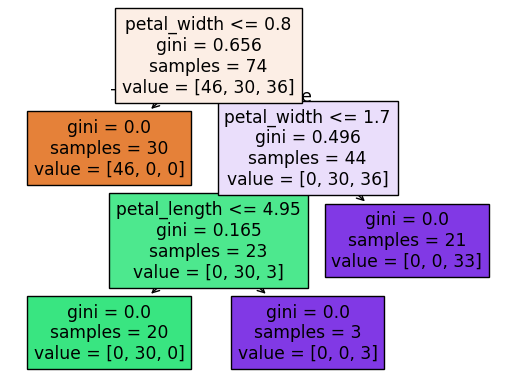

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

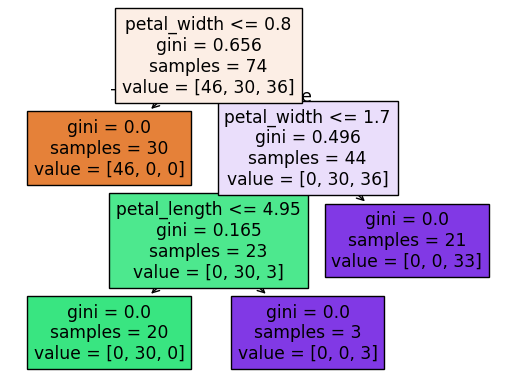

In [7]:
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

# 연습문제

아래 파라미터를 그리드 서치 & 랜덤 서치를 활용하여 가장 성능이 좋았던 모델을 찾아보세요.

1. n_estimators (나무 개수)
2. criterion: ```gini```: 지니 불순도, ```entropy```: 엔트로피 (정보 이득)
3. max_depth
4. max_features: ```sqrt```, ```log2```, ```None```
5. class_weight: ```None```: 모든 클래스에 동일한 가중치 1 부여 (기본값), ```balanced```: 클래스 빈도의 역수에 비례하여 자동으로 가중치 조정 (샘플 수가 적은 클래스에 높은 가중치 부여)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'class_weight' : [None, "balanced"]}

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring="accuracy")
grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [18]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'n_estimators': 150}

In [19]:
grid_search.best_score_

0.982213438735178

In [20]:
model = grid_search.best_estimator_
model.score(test_x, test_y)

0.9473684210526315

In [22]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_).to_excel("result_grid_search.xlsx", index = False)

# <랜덤포레스트 모델로 암 예측 모델 만들기>

In [35]:
import numpy as np
import pandas as pd
df = pd.read_csv("Data/diabetes.csv")

X = df.drop("target", axis = 1)
Y = df["target"]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y)

## 그리드서치, 랜덤서치로 한 결과

In [21]:
param = {"max_depth" : [None, 1, 5, 10, 20],
         "min_samples_leaf" : range(1, 21),
         "min_samples_split" : [2, 5, 10, 20, 30, 40],
         "max_features" : [None, "sqrt", "log2", 0.7]}     

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RandomizedSearchCV

model = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator = model,
                                  param_distributions = param,
                                  n_iter = 1000, cv = 5, scoring = "r2") 

random_search.fit(train_x, train_y)

C:\Users\campus4D019\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=1000,
                   param_distributions={'max_depth': [None, 1, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         0.7],
                                        'min_samples_leaf': range(1, 21),
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40]},
                   scoring='r2')

In [22]:
model = random_search.best_estimator_ 

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.558445179796535
0.26470357791532917


## 랜덤포레스트로 한 결과

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(train_x, train_y)

RandomForestClassifier()

In [40]:
model.score(test_x, test_y)

0.0

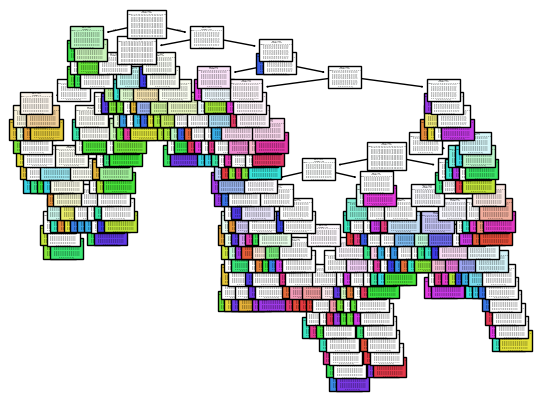

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True) 
model.fit(X, Y)

RandomForestClassifier(oob_score=True)

In [32]:
model.oob_score_

0.00904977375565611